# Notebook for generating draft volcanostratigraphy columns for the Cardenas Basalts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from pystrat import pystrat
import seaborn as sns
%config InlineBackend.figure_format='retina'

## import strat data

In [2]:
Nankoweap_Canyon_data = pd.read_csv('../data/strat/Nankoweap_Canyon_strat.csv')
Lava_Chuar_data = pd.read_csv('../data/strat/Lava_Chuar_strat.csv')
Basalt_Canyon_data = pd.read_csv('../data/strat/Basalt_Canyon_strat.csv')

Nankoweap_sample_strat = pd.read_csv('../data/strat/Nankoweap_sample_strat.csv')
Lava_Chuar_sample_strat = pd.read_csv('../data/strat/Lava_Chuar_sample_strat.csv')
Basalt_Canyon_sample_strat = pd.read_csv('../data/strat/Basalt_Canyon_sample_strat.csv')

display(Nankoweap_Canyon_data.head())
display(Lava_Chuar_data.head())
display(Basalt_Canyon_data.head())

,thickness,grain size,lithology,structure
0,4.0,C,basalt,NaN
1,11.4,C,basalt,vesicles
2,4.7,M,vesicular basalt,many vesicles; flow top
3,2.7,C,basalt,NaN
4,10.5,C,basalt,NaN


,thickness,grain size,lithology,structure
0,2.0,C,basalt,NaN
1,12.0,C,basalt,NaN
2,2.7,M,vesicular basalt,many vesicles
3,0.5,F,sandstone,flow top
4,4.2,C,basalt,NaN


,thickness,grain size,lithology,structure
0,2.0,VF,sandstone,NaN
1,0.3,F,sandstone,ripple
2,0.7,cover,cover,NaN
3,1.8,VF,sandstone,NaN
4,0.8,C,basalt,NaN


## import and merge geochemistry data

In [3]:
new_XRF_data = pd.read_excel('../data/geochem/GAL-NS-311_XRF.xlsx', engine = 'openpyxl', sheet_name='GAL-NS-311_XRF')
new_XRF_norm_major = new_XRF_data.iloc[19:29, :24]
new_XRF_norm_major = new_XRF_norm_major.T

new_XRF_norm_major.columns = ['SiO2',	'TiO2',	'Al2O3', 'FeO',	'MnO',	'MgO',	'CaO',	'Na2O',	'K2O',	'P2O5']
new_XRF_norm_major = new_XRF_norm_major.iloc[1:]
# calcualte #Mg
new_XRF_norm_major['#Mg'] = new_XRF_norm_major['MgO'] / (new_XRF_norm_major['MgO']+new_XRF_norm_major['FeO']) * 100
new_XRF_norm_major.head()

,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,#Mg
UI1-6,49.670918,2.13576,16.863352,13.047924,0.186221,5.342008,6.462298,2.798424,2.925741,0.567354,29.048546
UI2-1,49.689445,1.994781,17.20876,12.371225,0.138821,5.831087,8.333444,2.9309,0.973793,0.527744,32.034871
UI3-2,48.837455,2.105236,16.525303,13.521811,0.211995,5.272963,8.257009,3.244001,1.466229,0.557997,28.055475
UI4-4,48.880241,2.525334,15.938468,12.305309,0.211934,7.351773,7.469468,3.312725,1.655071,0.349676,37.400122
UI5-8,49.009283,2.679025,15.920535,12.130436,0.198744,6.10953,8.08964,3.654003,1.795117,0.413686,33.495295


In [4]:
Nankoweap_sample_XRF = pd.merge(Nankoweap_sample_strat, new_XRF_norm_major, left_on='sample', right_index=True)
Lava_Chuar_sample_XRF = pd.merge(Lava_Chuar_sample_strat, new_XRF_norm_major, left_on='sample', right_index=True)
Basalt_Canyon_sample_XRF = pd.merge(Basalt_Canyon_sample_strat, new_XRF_norm_major, left_on='sample', right_index=True)


## set up color, width, and swatch patterns

In [5]:
lithology = ['basalt', 'vesicular basalt', 'cover', 'sandstone', 'volcaniclastic']
color = ['darkgrey', 'darkgrey', 'white', 'indianred', 'tan']

color_chart = pd.Series(index=lithology, data = color)
color_chart

basalt               darkgrey
vesicular basalt     darkgrey
cover                   white
sandstone           indianred
volcaniclastic            tan
dtype: object

In [6]:
swatches = [717, 602, 0, 607, 715]
swatch_chart = pd.Series(index=lithology, data = swatches)
swatch_chart

basalt              717
vesicular basalt    602
cover                 0
sandstone           607
volcaniclastic      715
dtype: int64

In [7]:
grain_size = ['cover', 'VF', 'F', 'M', 'C']
widths = [0.0, 0.25, 0.5, 0.75, 1.0]
width_chart = pd.Series(index=grain_size, data = widths)
width_chart

cover    0.00
VF       0.25
F        0.50
M        0.75
C        1.00
dtype: float64

## make color and width references in tables

In [8]:
Nankoweap_Canyon_data['color'] = [color_chart[i] for i in Nankoweap_Canyon_data['lithology']]
Nankoweap_Canyon_data['width'] = [width_chart[i] for i in Nankoweap_Canyon_data['grain size']]
Nankoweap_Canyon_data['swatch'] = [swatch_chart[i] for i in Nankoweap_Canyon_data['lithology']]

Lava_Chuar_data['color'] = [color_chart[i] for i in Lava_Chuar_data['lithology']]
Lava_Chuar_data['width'] = [width_chart[i] for i in Lava_Chuar_data['grain size']]
Lava_Chuar_data['swatch'] = [swatch_chart[i] for i in Lava_Chuar_data['lithology']]

Basalt_Canyon_data['color'] = [color_chart[i] for i in Basalt_Canyon_data['lithology']]
Basalt_Canyon_data['width'] = [width_chart[i] for i in Basalt_Canyon_data['grain size']]
Basalt_Canyon_data['swatch'] = [swatch_chart[i] for i in Basalt_Canyon_data['lithology']]

## Nankoweap Canyon strat

In [9]:
# create a pystrat Section from the lithostratigraphy data
Nankoweap_section = pystrat.Section(Nankoweap_Canyon_data['thickness'], Nankoweap_Canyon_data['lithology'])

# create a pystrat Style from the styling files
Nankoweap_style = pystrat.Style(Nankoweap_Canyon_data['lithology'], Nankoweap_Canyon_data['color'],
                                Nankoweap_Canyon_data['width'])

/Users/yimingzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


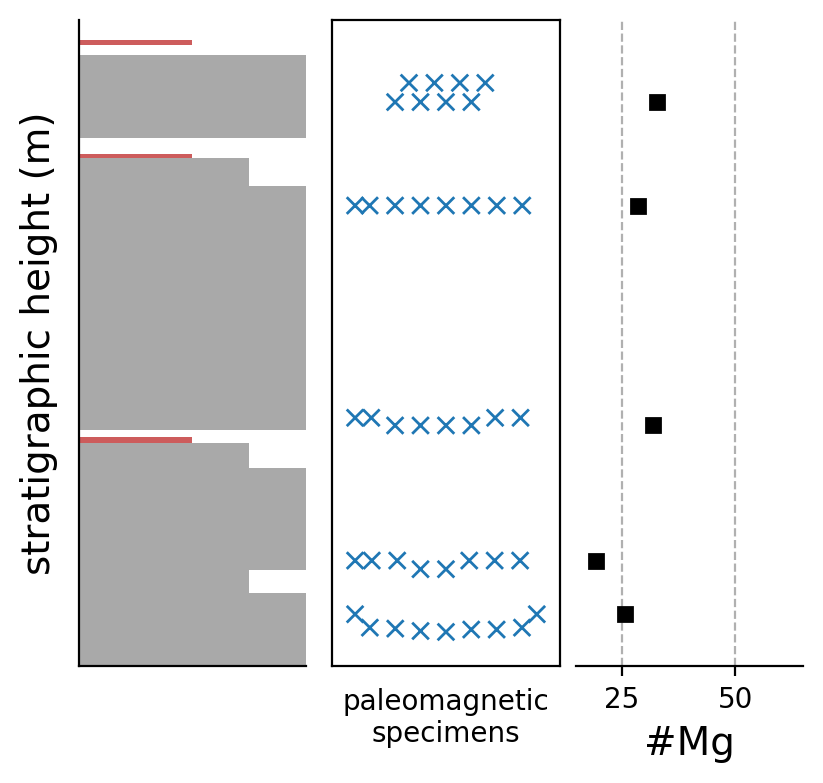

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(4, 3.8), sharey=True, constrained_layout=True)
Nankoweap_section.plot(Nankoweap_style, ax=ax[0], linewidth=0)

ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_ylim(0, 135)
ax[0].set_yticks([0,20,40,60,80,100,120])
ax[0].set_yticklabels(labels=['0','20','40','60','80','100','120'], fontdict={'size':14})
ax[0].set_ylabel('stratigraphic height (m)', fontdict={'size':14})
ax[0].grid(False)

sns.swarmplot(y = Nankoweap_sample_strat['strat_level'], marker='x', s=6, edgecolor=None, linewidth=1, ax = ax[1])

ax[1].set_xlabel('paleomagnetic\nspecimens')
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)

ax[2].plot(Nankoweap_sample_XRF['#Mg'], Nankoweap_sample_XRF['strat_level'], 's', color='black', markersize=5)
ax[2].set_xlabel('#Mg', fontdict={'size':14})
ax[2].set_ylabel('')
ax[2].set_xlim(15, 65)
ax[2].grid(True, linestyle='--')
# Remove the top, left, and right spines
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)

plt.savefig('code_output/Nankoweap_strat.pdf', bbox_inches='tight')
plt.show()

## Lava Chuar strat

In [11]:
# create a pystrat Section from the lithostratigraphy data
Lava_Chuar_section = pystrat.Section(Lava_Chuar_data['thickness'], Lava_Chuar_data['lithology'])

# create a pystrat Style from the styling files
Lava_Chuar_style = pystrat.Style(Lava_Chuar_data['lithology'],Lava_Chuar_data['color'], Lava_Chuar_data['width'])

/Users/yimingzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


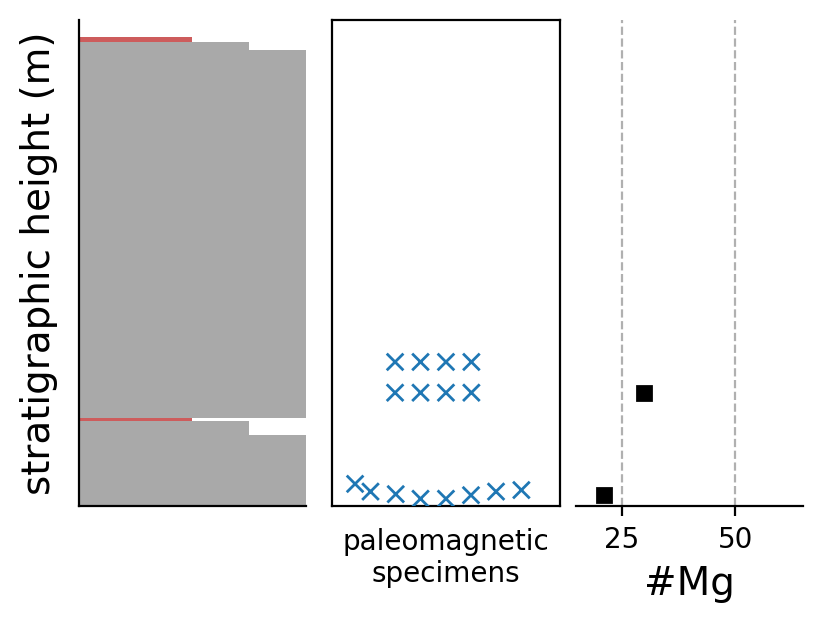

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(4, 3), sharey=True, constrained_layout=True)
Lava_Chuar_section.plot(Lava_Chuar_style, ax=ax[0], linewidth=0)

ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_ylim(0, 95)
ax[0].set_yticks([0,20,40,60,80,95])
ax[0].set_yticklabels(labels=['0','20','40','60','80','95'], fontdict={'size':14})
ax[0].grid(False)
ax[0].set_ylabel('stratigraphic height (m)', fontdict={'size':14})

sns.swarmplot(y = Lava_Chuar_sample_strat['strat_level'], marker='x', s=6, edgecolor=None, linewidth=1, ax = ax[1])

ax[1].set_xlabel('paleomagnetic\nspecimens')
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)

ax[2].plot(Lava_Chuar_sample_XRF['#Mg'], Lava_Chuar_sample_XRF['strat_level'], 's', color='black', markersize=5)
ax[2].set_xlabel('#Mg', fontdict={'size':14})
ax[2].set_ylabel('')
ax[2].set_xlim(15, 65)
ax[2].grid(True, linestyle='--')
# Remove the top, left, and right spines
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)


plt.savefig('code_output/Lava_Chuar_strat.pdf', bbox_inches='tight')
plt.show()

## Basalt Canyon strat

In [13]:
# create a pystrat Section from the lithostratigraphy data
Basalt_Canyon_section = pystrat.Section(Basalt_Canyon_data['thickness'], Basalt_Canyon_data['lithology'])

# create a pystrat Style from the styling files
Basalt_Canyon_style = pystrat.Style(Basalt_Canyon_data['lithology'],Basalt_Canyon_data['color'],Basalt_Canyon_data['width'])

/Users/yimingzhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


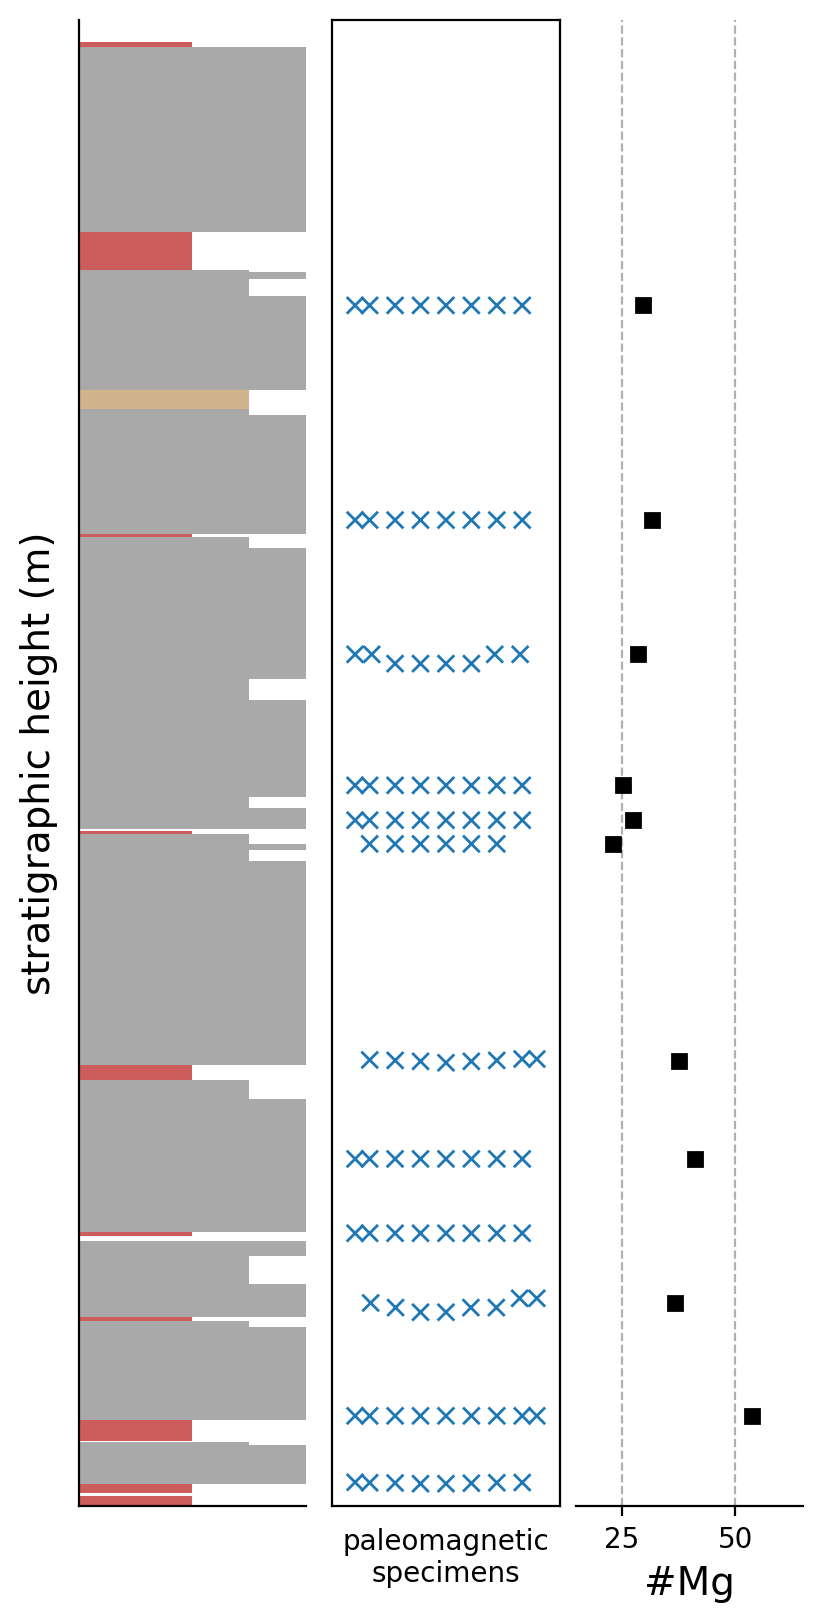

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(4, 8), sharey=True, constrained_layout=True)
Basalt_Canyon_section.plot(Basalt_Canyon_style, ax=ax[0], linewidth=0)

ax[0].set_xticks([])
ax[0].set_xticklabels([])
ax[0].set_ylim(0, 320)
ax[0].set_yticks([0,40,80,120,160,200,240,280,320])
ax[0].set_yticklabels(labels=['0','40','80','120','160','200','240','280','320'], fontdict={'size':14})
ax[0].grid(False)
ax[0].set_ylabel('stratigraphic height (m)', fontdict={'size':14})

sns.swarmplot(y = Basalt_Canyon_sample_strat['strat_level'], marker='x', s=6, edgecolor=None, linewidth=1, ax = ax[1])

ax[1].set_xlabel('paleomagnetic\nspecimens')
ax[1].set_ylabel('')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].grid(False)

ax[2].plot(Basalt_Canyon_sample_XRF['#Mg'], Basalt_Canyon_sample_XRF['strat_level'], 's', color='black', markersize=5)
ax[2].set_xlabel('#Mg', fontdict={'size':14})
ax[2].set_ylabel('')
ax[2].set_xlim(15, 65)
ax[2].grid(True, linestyle='--')
# Remove the top, left, and right spines
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)

plt.savefig('code_output/Basalt_Canyon_strat.pdf', bbox_inches='tight')
plt.show()